In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [4]:
data=np.load('./Datasets/mnist_train_small.npy')

In [5]:
x=data[:,1:]
y=data[:,0]

In [6]:
x


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [7]:
y

array([5, 7, 9, ..., 2, 9, 5], dtype=uint8)

In [8]:
x.shape,y.shape

((19999, 784), (19999,))

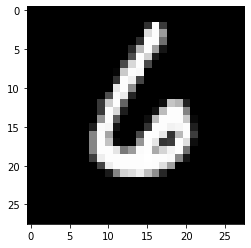

In [24]:
plt.imshow(x[2023].reshape(28,28),cmap="gray")

In [21]:
y[2023]

6

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [32]:
x_train.shape,y_train.shape



((13399, 784), (13399,))

In [33]:
x_test.shape,y_test.shape

((6600, 784), (6600,))

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
model=KNeighborsClassifier()

In [40]:
model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [41]:
model.predict(x_test[:10])

array([1, 7, 0, 9, 4, 5, 4, 6, 9, 2], dtype=uint8)

In [42]:
y_test[:10]

array([7, 7, 0, 9, 4, 5, 4, 6, 9, 2], dtype=uint8)

In [44]:
model.score(x_test[:100],y_test[:100])

0.95

## Custom KNN

In [45]:
class CustomKNN:
    # constructor
    def __init__(self, n_neighbours=5):
        self.n_neighbours = n_neighbours
        
    # training function
    def fit(self, X, y):
        self._X = (X - X.mean()) / X.std() # standardisation
        self._y = y
    
    # predict point
    # given a single point, tell me which class it belongs to 
    def predict_point(self, point):
        # storing the dis of given 'point' from each point in training data
        list_dist = []
        
        # these points are from my training data
        for x_point, y_point in zip(self._X, self._y):
            dist_point = ((point - x_point) ** 2).sum()
            list_dist.append([dist_point, y_point])
        
        ## sorting the list according to the distance
        sorted_dist = sorted(list_dist)
        top_k = sorted_dist[:self.n_neighbours]
        
        # taking the count 
        items, counts = np.unique(np.array(top_k)[:, 1], return_counts=True)
        ans = items[np.argmax(counts)]
        return ans
            
    # predict
    # give me answer for each number in the array
    def predict(self, X):
        results = []
        X = (X - X.mean()) / X.std() 
        for point in X:
            results.append(self.predict_point(point))
        return np.array(results, dtype=int)
    
    # score to measure my accuracy
    def score(self, X, y):
        return sum(self.predict(X) == y) / len(y)

In [46]:
m2 = CustomKNN()

In [48]:

m2.fit(x_train, y_train)



In [50]:
m2.predict(x_test[:10])

array([1, 7, 0, 9, 4, 5, 4, 6, 9, 2])

In [51]:
y_test[:10]

array([7, 7, 0, 9, 4, 5, 4, 6, 9, 2], dtype=uint8)

In [54]:
m2.score(x_test[:100], y_test[:100])

0.95